## Databricks utilities
- we have several utilities of databricks. Here in this notebook we will discuss all one by one.
- You can check all utilities with <code>dbutils.help()</code>.
- This module provides various utilities for users to interact with the rest of Databricks.

In [0]:
dbutils.help()

This module provides various utilities for users to interact with the rest of Databricks.
 credentials: DatabricksCredentialUtils -> Utilities for interacting with credentials within notebooks data: DataUtils -> Utilities for understanding and interacting with datasets (EXPERIMENTAL) fs: DbfsUtils -> Manipulates the Databricks filesystem (DBFS) from the console jobs: JobsUtils -> Utilities for leveraging jobs features library: LibraryUtils -> Utilities for session isolated libraries meta: MetaUtils -> Methods to hook into the compiler (EXPERIMENTAL) notebook: NotebookUtils -> Utilities for the control flow of a notebook (EXPERIMENTAL) preview: Preview -> Utilities under preview category secrets: SecretUtils -> Provides utilities for leveraging secrets within notebooks widgets: WidgetsUtils -> Methods to create and get bound value of input widgets inside notebooks

**data: DataUtils -> Utilities for understanding and interacting with datasets (EXPERIMENTAL)**
- check the utilities information with <code>dbuitls.data.help()</code>.
- we can check the information for specific functions with <code>dbutils.data.help("functionname")</code>.

In [0]:
dbutils.data.help()

dbutils.data provides utilities for understanding and interpreting datasets.
This module is currently in preview and may be unstable.

For more info about a method, use dbutils.data.help("methodName") .
 summarize(df: Object, precise: boolean): void -> Summarize a Spark DataFrame and visualize the statistics to get quick insights

In [0]:
# check the details of method.
dbutils.data.help("summarize")

/** * Summarize a Spark DataFrame and visualize the statistics to get quick insights. * * Example: dbutils.data.summarize(df, precise=false) * * @param df The dataframe to summarize. Streaming dataframes are not supported. * @param precise If false, percentiles, distinct item counts, and frequent item counts will * be computed approximately to reduce the run time. * If true, distinct item counts and frequent item counts will be computed * exactly, and percentiles will be computed with high precision. * * @return visualization of the computed summmary statistics. */ summarize(df: java.lang.Object, precise: boolean): void

Lets check the values that we will get after using summarize function.
- we will take an example of spacex launches data from the Filestore.

In [0]:
df = spark.read.format("csv").load("dbfs:/FileStore/spaceX/launches_outcomes", header=True)

In [1]:
# dbutils.data.summarize(df)

**fs: DbfsUtils -> Manipulates the Databricks filesystem (DBFS) from the console**
- This part is used to interact with the DBFS file system.
- We have several functions for several actions.
- check the utilities information with <code>dbuitls.fs.help()</code>.
- we can check the information for specific functions with <code>dbutils.fs.help("functionname")</code>.

In [0]:
dbutils.fs.help()

dbutils.fs provides utilities for working with FileSystems. Most methods in
this package can take either a DBFS path (e.g., "/foo" or "dbfs:/foo"), or
another FileSystem URI.

For more info about a method, use dbutils.fs.help("methodName") .

In notebooks, you can also use the %fs shorthand to access DBFS. The %fs shorthand maps
straightforwardly onto dbutils calls. For example, "%fs head --maxBytes=10000 /file/path"
translates into "dbutils.fs.head("/file/path", maxBytes = 10000)".
 mount mount(source: String, mountPoint: String, encryptionType: String = "", owner: String = null, extraConfigs: Map = Map.empty[String, String]): boolean -> Mounts the given source directory into DBFS at the given mount point mounts: Seq -> Displays information about what is mounted within DBFS refreshMounts: boolean -> Forces all machines in this cluster to refresh their mount cache, ensuring they receive the most recent information unmount(mountPoint: String): boolean -> Deletes a DBFS mount point updateMount(source: String, mountPoint: String, encryptionType: String = "", owner: String = null, extraConfigs: Map = Map.empty[String, String]): boolean -> Similar to mount(), but updates an existing mount point (if present) instead of creating a new one fsutils cp(from: String, to: String, recurse: boolean = false): boolean -> Copies a file or directory, possibly across FileSystems head(file: String, maxBytes: int = 65536): String -> Returns up to the first 'maxBytes' bytes of the given file as a String encoded in UTF-8 ls(dir: String): Seq -> Lists the contents of a directory mkdirs(dir: String): boolean -> Creates the given directory if it does not exist, also creating any necessary parent directories mv(from: String, to: String, recurse: boolean = false): boolean -> Moves a file or directory, possibly across FileSystems put(file: String, contents: String, overwrite: boolean = false): boolean -> Writes the given String out to a file, encoded in UTF-8 rm(dir: String, recurse: boolean = false): boolean -> Removes a file or directory

In this section i will perform some operations with the help of utilities functions.

In [0]:
dbutils.fs.mkdirs("/FileStore/FS1")

Out[13]: True

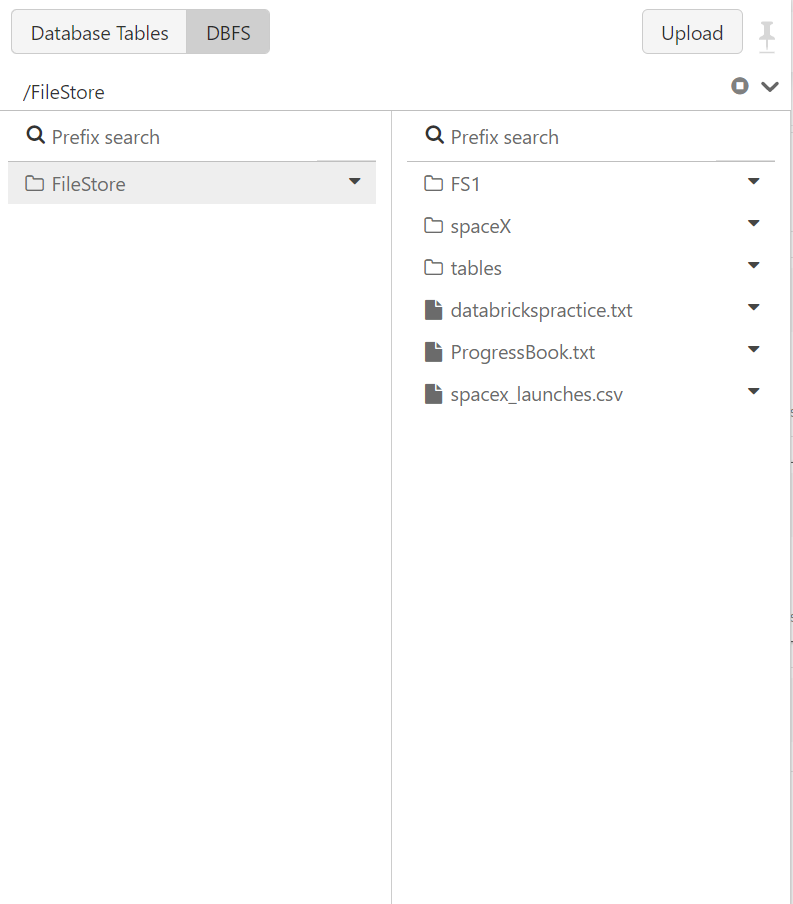

We have <code>databrickspratice.txt</code> file that i want to copy in FS1.

In [0]:
dbutils.fs.cp("dbfs:/FileStore/databrickspractice.txt","dbfs:/FileStore/FS1")

Out[14]: True

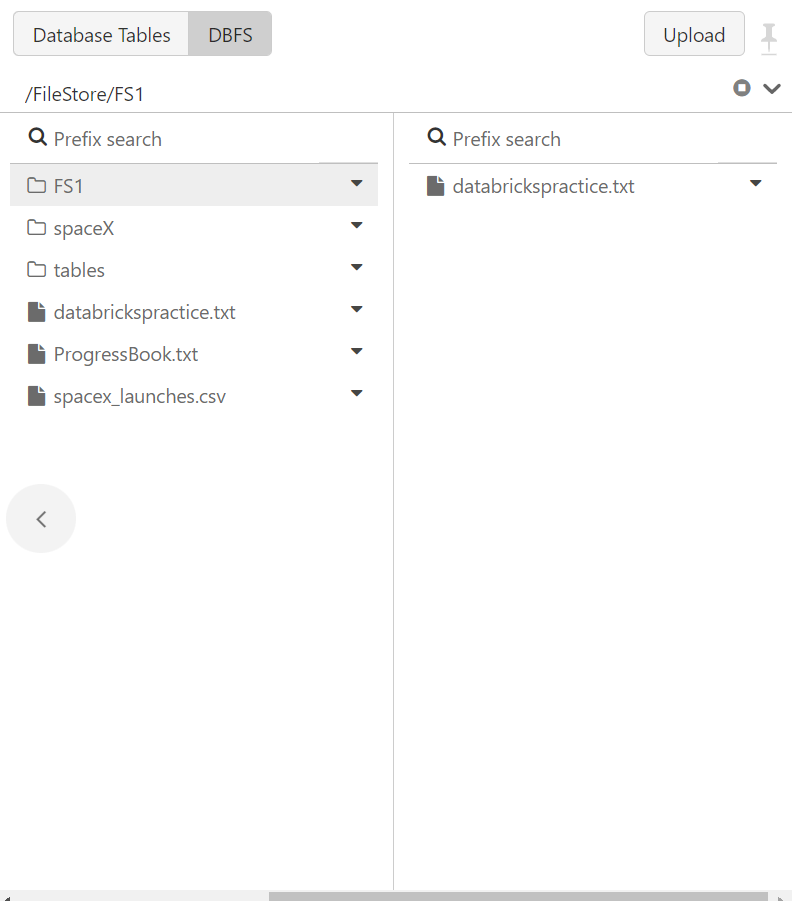

Remove the File databrickspractice.txt from FS1.

In [0]:
dbutils.fs.rm("dbfs:/FileStore/FS1/databrickspractice.txt")

Out[15]: True

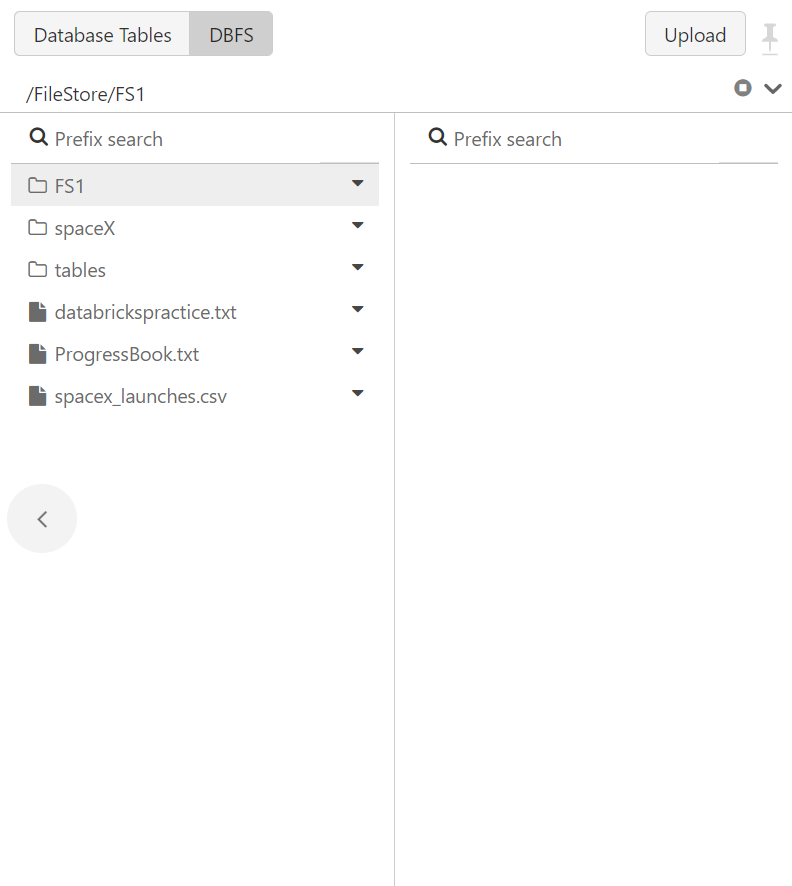

Move the file databrickspractice.txt from FileStore to FS1

In [0]:
dbutils.fs.mv("dbfs:/FileStore/databrickspractice.txt","dbfs:/FileStore/FS1/databrickspractice.txt")

Out[16]: True

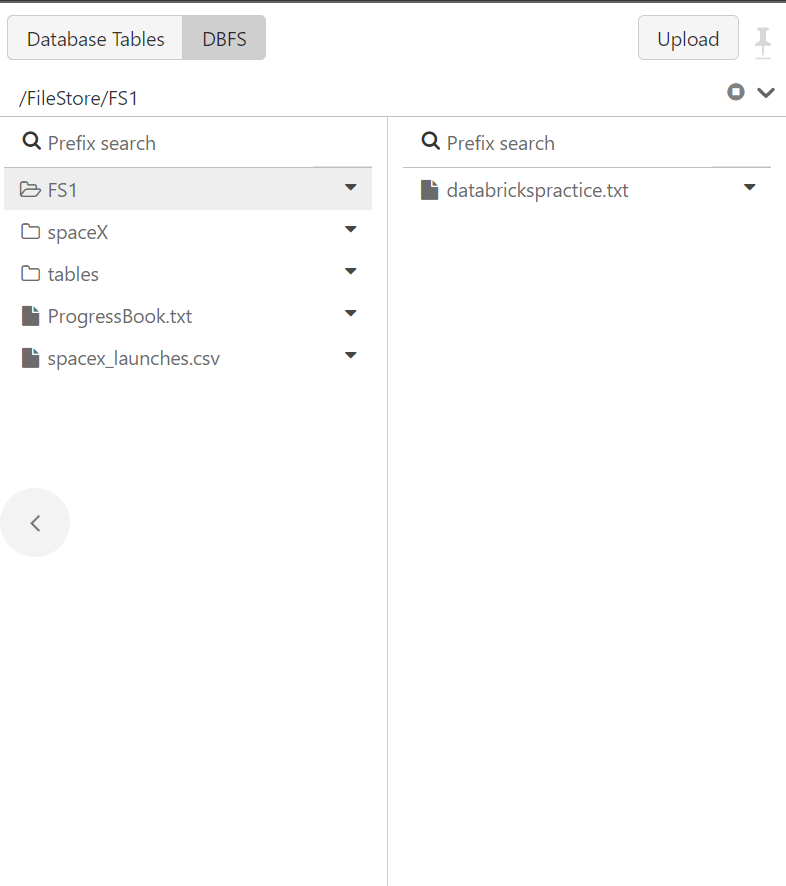

List out all the files in the directory

In [0]:
dbutils.fs.ls("/FileStore")

Out[18]: [FileInfo(path='dbfs:/FileStore/FS1/', name='FS1/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/ProgressBook.txt', name='ProgressBook.txt', size=19768, modificationTime=1662468779000),
 FileInfo(path='dbfs:/FileStore/spaceX/', name='spaceX/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/spacex_launches.csv', name='spacex_launches.csv', size=11649, modificationTime=1662454265000),
 FileInfo(path='dbfs:/FileStore/tables/', name='tables/', size=0, modificationTime=0)]

Check the content of file with the help of head function.

In [0]:
dbutils.fs.head("dbfs:/FileStore/FS1/databrickspractice.txt")

Out[20]: 'This is a practice of databricks\r\nHere in this document i have write useless stuff.'

Change the content of file with the help of put command.

In [0]:
dbutils.fs.put("dbfs:/FileStore/FS1/databrickspractice.txt","Added this text with put function.",overwrite=True)

Wrote 34 bytes.
Out[22]: True

In [0]:
dbutils.fs.head("dbfs:/FileStore/FS1/databrickspractice.txt")

Out[23]: 'Added this text with put function.'

**These are some Utilities functions that are very helpful for interacting with databricks.**